In [1]:
import numpy as np 
import pandas as pd 

In [2]:
attr_data = pd.read_csv('Attribute dataset.csv')

In [3]:
attr_data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [8]:
attr_data.Size.replace({'M':"Medium", 'L':'Large', 'XL':'Extra Large', 'free':'Free', 'S':'Small', 's':'Small', 'small':'Small'},inplace =True)

In [4]:
attr_data.shape

(479, 13)

In [5]:
dress_sales = pd.read_csv("DressSales.csv")

In [6]:
dress_sales.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1190380701,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [7]:
dress_sales.shape

(479, 24)

In [9]:
dress_sales['18-09-2013'][dress_sales['18-09-2013']=='removed']

263    removed
Name: 18-09-2013, dtype: object

In [10]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
dress_sales.loc[dress_sales['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN

dress_sales.loc[dress_sales['14-09-2013']== 'removed',"14-09-2013"] = np.NaN

dress_sales.loc[dress_sales['16-09-2013']== 'removed',"16-09-2013"] = np.NaN

dress_sales.loc[dress_sales['18-09-2013']== 'removed',"18-09-2013"] = np.NaN

dress_sales.loc[dress_sales['20-09-2013']== 'removed',"20-09-2013"] = np.NaN

dress_sales.loc[dress_sales['22-09-2013']== 'Orders',"22-09-2013"] = np.NaN


In [11]:
# Convert the object type columns in "Dress Sales" into float type of data type.

dress_sales['18-09-2013']=dress_sales['18-09-2013'].astype(float)
dress_sales['14-09-2013']=dress_sales['14-09-2013'].astype(float)
dress_sales['16-09-2013']=dress_sales['16-09-2013'].astype(float)
dress_sales['20-09-2013']=dress_sales['20-09-2013'].astype(float)
dress_sales['22-09-2013']=dress_sales['22-09-2013'].astype(float)
dress_sales['09-12-2013']=dress_sales['09-12-2013'].astype(float)

In [13]:
# Print the null percetange of each column of data1.
(dress_sales.isnull().sum()[dress_sales.isnull().sum()/dress_sales.shape[0]*100.0 >40])[:]

Series([], dtype: int64)

In [12]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
dress_sales.drop(columns =['26-09-2013','30-09-2013','10-02-2013','10-04-2013','10-08-2013','10-10-2013'],inplace=True)

In [14]:
# Create the four seasons columns in data1, according to the above criteria.
Summer = (dress_sales[['29-08-2013','31-08-2013','09-06-2013','09-08-2013', '10-06-2013']].sum()).sum()

Autumn = (dress_sales[['09-10-2013', '14-09-2013','16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013',
       '28-09-2013']].sum()).sum()

Winter = (dress_sales[['09-02-2013','10-12-2013']].sum()).sum()

Spring = (dress_sales['09-04-2013'].sum()).sum()

In [15]:
print(Summer)
print(Autumn)
print(Winter)
print(Spring)

691907
1363288.0
314990
143600


In [16]:
dress_sales['Spring'] = dress_sales.apply(lambda x: x['09-04-2013'], axis=1)

dress_sales['Summer'] = dress_sales.apply(lambda x: x['29-08-2013'] + x['31-08-2013']+ x['09-06-2013']+ x['09-08-2013']+ x['10-06-2013'], axis=1)

dress_sales['Winter'] = dress_sales.apply(lambda x: x['09-02-2013'] + x['09-12-2013']+ x['10-12-2013'], axis=1)

dress_sales['Autumn'] = dress_sales.apply(lambda x: x['09-10-2013'] + x['14-09-2013']+ x['16-09-2013']+ x['18-09-2013']+ x['20-09-2013']+ x['22-09-2013']+ x['24-09-2013']+ x['28-09-2013'], axis=1)

In [17]:
data0 = pd.merge(left=attr_data,right=dress_sales, how='left', left_on='Dress_ID', right_on='Dress_ID')
data0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Spring,Summer,Winter,Autumn
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,2660.0,13899.0,9658.0,26857.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,750.0,6216.0,6405.0,17311.0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,7.0,40.0,28.0,82.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,1455.0,7213.0,5012.0,14411.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,1396.0,7706.0,5678.0,14676.0


In [18]:
data0.shape

(479, 34)

In [19]:
# Now Drop the Date columns from data0 as it is already combined into four seasons.
data0.drop(data0.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)

In [20]:
data0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Spring,Summer,Winter,Autumn
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1,2660.0,13899.0,9658.0,26857.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0,750.0,6216.0,6405.0,17311.0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0,7.0,40.0,28.0,82.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1,1455.0,7213.0,5012.0,14411.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,1396.0,7706.0,5678.0,14676.0


In [21]:
#correcting the spellings.
data0.Season= data0.Season.replace('Automn', "Autumn")

data0.Season= data0.Season.replace('spring', "Spring")

data0.Season= data0.Season.replace('winter', "Winter")

In [22]:
data0['TotalSales'] = data0.apply(lambda x: x['Summer'] + x['Winter']+ x['Autumn']+ x['Spring'], axis=1)

In [23]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
data0.groupby(data0.Style).sum()[(data0.groupby(data0.Style).sum()).TotalSales<50000]

,Dress_ID,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Spring,Summer,Winter,Autumn,TotalSales
Style,,,,,,,,,,,,,,,,,
Flare,2011575734,AverageAverage,0.0,FreeFree,SpringSpring,v-neckv-neck,shortshort,cottonnylon,broadcloth,beading,solidanimal,1,71.0,451.0,406.0,1161.0,2089.0
Novelty,6799573268,AverageAverageAverageMediumAverageAverage,14.1,SmallLargeFreeMediumFreeFree,WinterAutumnSummerWinterWinterSummer,turndowncolloro-necko-necko-necko-necko-neck,fullshortfullhalfsleeveshortsleeveless,cottonpolystercottonpolysterpolyster,chiffonsattinchiffonbroadcloth,hollowouthollowoutlace,patchworkprintsolidanimalprint,3,563.0,2866.0,2504.0,7353.0,13286.0
OL,1194626925,Medium,0.0,Medium,Winter,mandarin-collor,halfsleeve,cotton,0,sashes,solid,0,15.0,63.0,53.0,158.0,289.0
fashion,836788720,Average,4.0,Free,Summer,open,full,cotton,0,sequined,solid,0,19.0,91.0,74.0,211.0,395.0


In [24]:
#Replace with 'Others'
data0.replace(data0.groupby(data0.Style).sum()[(data0.groupby(data0.Style).sum()).TotalSales<50000].index,'Others',inplace=True)

In [25]:
round(data0.Style.value_counts(normalize=True)*100.0,1)

Style
Casual      45.7
Sexy        13.8
party       10.6
cute         9.2
vintage      5.2
bohemian     4.8
Brief        3.5
work         3.5
Others       2.1
sexy         1.5
Name: proportion, dtype: float64

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

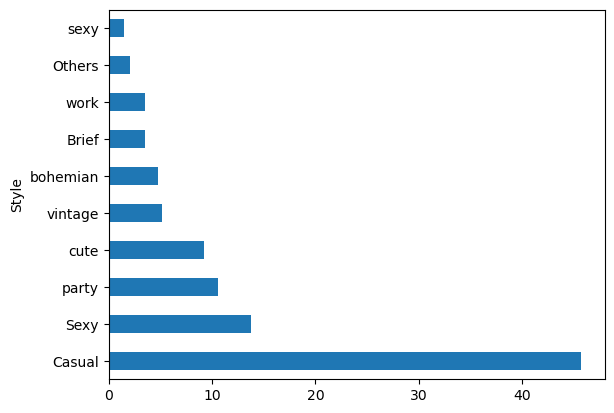

In [28]:
# Calculate the percentage of each categories in the "Style" variable.
(round(data0.Style.value_counts(normalize=True)*100.0,1)).plot.barh()
plt.show()

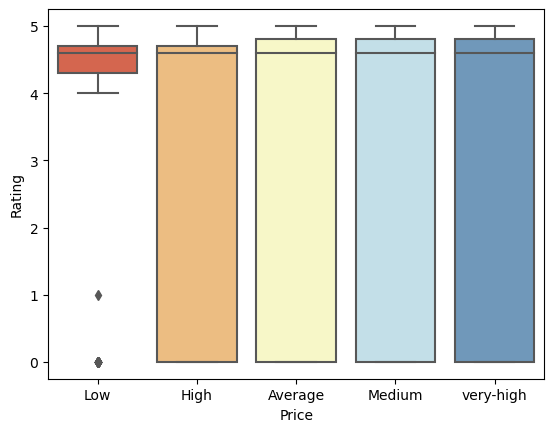

In [29]:
sns.boxplot(data = data0, x = 'Price', y = 'Rating', palette= 'RdYlBu')
plt.show()

Recommendation
0    298.051095
1    302.117073
Name: Spring, dtype: float64


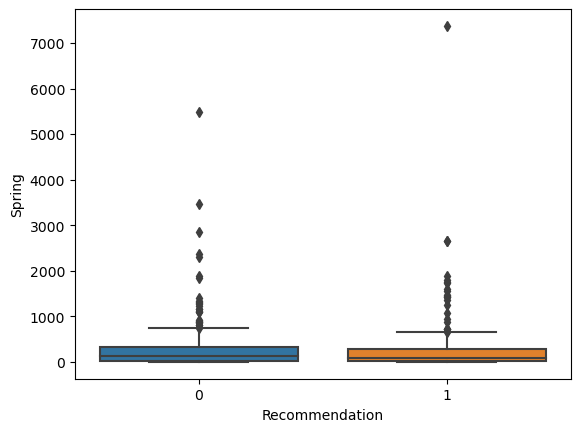

In [30]:
print(data0.groupby('Recommendation')['Spring'].mean())
sns.boxplot(data=data0, x="Recommendation",y="Spring")
plt.show()

Recommendation
0    2840.193431
1    2834.137931
Name: Autumn, dtype: float64


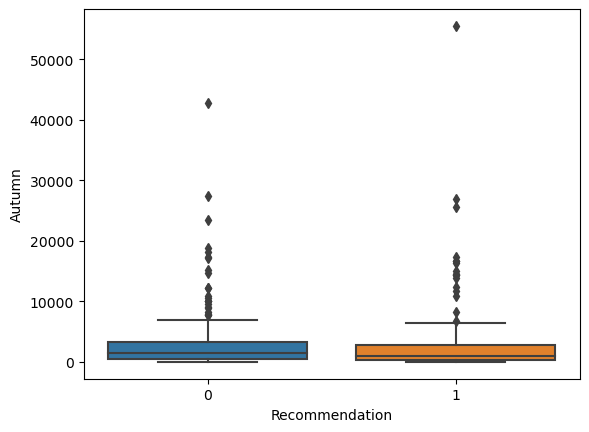

In [31]:
print(data0.groupby('Recommendation')['Autumn'].mean())
sns.boxplot(data=data0, x="Recommendation",y="Autumn")
plt.show()

In [32]:
data0.groupby('Size')['Recommendation'].sum()

Size
Extra Large     4
Free           76
Large          36
Medium         76
Small          13
Name: Recommendation, dtype: int64

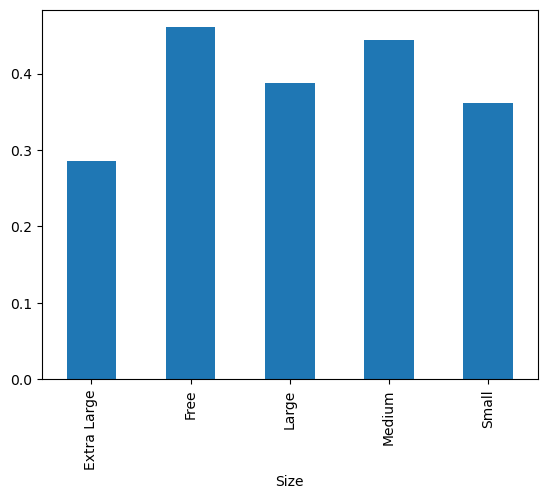

In [33]:
data0.groupby(['Size'])['Recommendation'].mean().plot.bar()
plt.show()

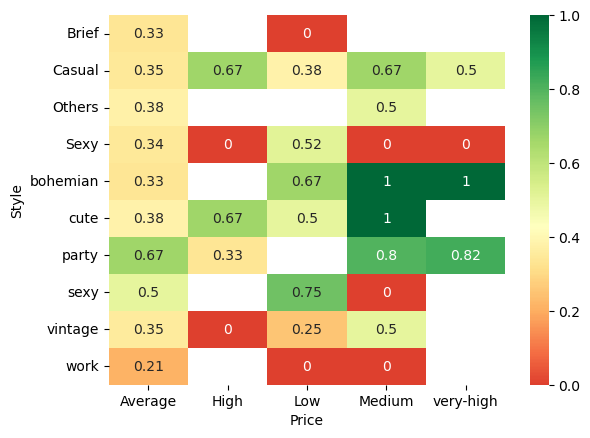

In [34]:
res = pd.pivot_table(data=data0, index="Style", columns="Price", values="Recommendation")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)
plt.show()

In [35]:
data0.columns 

Index(['Dress_ID', 'Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'Material', 'FabricType', 'Decoration', 'Pattern Type',
       'Recommendation', 'Spring', 'Summer', 'Winter', 'Autumn', 'TotalSales'],
      dtype='object')

In [36]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
 13  Spring          479 non-null    float64
 14  Summer          479 non-null    float64
 15  Winter          478 non-null    float64
 16  Autumn          477 non-null    float64
 17  TotalSales      477 non-null    flo

In [56]:
# Define the columns with missing values
columns_with_missing_values = ['Price', 'Season', 'NeckLine', 'SleeveLength', 'Material', 'FabricType', 'Decoration', 'Pattern Type', 'Winter', 'Autumn', 'TotalSales']

# Create a SimpleImputer to fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to columns with missing values
data0[columns_with_missing_values] = imputer.fit_transform(data0[columns_with_missing_values])


In [57]:
data0.isnull().sum()

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
Spring            0
Summer            0
Winter            0
Autumn            0
TotalSales        0
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score

In [61]:
data = data0.copy()

In [62]:
data.isnull().sum()

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
Spring            0
Summer            0
Winter            0
Autumn            0
TotalSales        0
dtype: int64

In [63]:
# Define features and target for regression
X = data.drop(columns=['Dress_ID', 'Recommendation', 'TotalSales'])
y = data['TotalSales']

In [64]:
X.isnull().sum()

Style           0
Price           0
Rating          0
Size            0
Season          0
NeckLine        0
SleeveLength    0
Material        0
FabricType      0
Decoration      0
Pattern Type    0
Spring          0
Summer          0
Winter          0
Autumn          0
dtype: int64

In [65]:
# Categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets for regression
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Define the models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(kernel='linear')
}

# Train and evaluate the regression models
for model_name, model in reg_models.items():
    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', model)])
    reg.fit(X_reg_train, y_reg_train)
    y_reg_pred = reg.predict(X_reg_test)
    print(f'Regression Results for {model_name}:\n')
    print(f'MAE: {mean_absolute_error(y_reg_test, y_reg_pred)}')
    print(f'MSE: {mean_squared_error(y_reg_test, y_reg_pred)}')
    print(f'R2: {r2_score(y_reg_test, y_reg_pred)}\n')
    print('\n' + '='*60 + '\n')


Regression Results for Linear Regression:

MAE: 932.0354503222425
MSE: 2018111.4839392144
R2: 0.9729502007609724



Regression Results for Random Forest:

MAE: 476.29572916666666
MSE: 842676.0205656248
R2: 0.988705174435978



Regression Results for SVR:

MAE: 4276.685691539266
MSE: 80934028.98693477
R2: -0.08480094044604813





In [67]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForestRegressor
rf_param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Define parameter grid for SVR
svr_param_grid = {
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__epsilon': [0.1, 0.2, 0.5, 1],
    'regressor__gamma': ['scale', 'auto']
}

# Create a dictionary of pipelines and parameter grids
pipelines = {
    'Random Forest': (Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', RandomForestRegressor(random_state=42))]), rf_param_grid),
    'SVR': (Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SVR(kernel='linear'))]), svr_param_grid)
}

# Function to perform Grid Search with Cross-Validation
def perform_grid_search(pipeline, param_grid, X_train, y_train):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

# Perform Grid Search for each model
best_models = {}
for model_name, (pipeline, param_grid) in pipelines.items():
    print(f"Performing Grid Search for {model_name}...")
    best_model = perform_grid_search(pipeline, param_grid, X_reg_train, y_reg_train)
    best_models[model_name] = best_model
    print(f"Best parameters for {model_name}: {best_model.best_params_}")
    print(f"Best cross-validation R2 score for {model_name}: {best_model.best_score_}")
    print('\n' + '='*60 + '\n')

# Evaluate the best models on the test set
for model_name, best_model in best_models.items():
    y_reg_pred = best_model.predict(X_reg_test)
    print(f'Regression Results for {model_name}:\n')
    print(f'MAE: {mean_absolute_error(y_reg_test, y_reg_pred)}')
    print(f'MSE: {mean_squared_error(y_reg_test, y_reg_pred)}')
    print(f'R2: {r2_score(y_reg_test, y_reg_pred)}\n')
    print('\n' + '='*60 + '\n')


Performing Grid Search for Random Forest...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters for Random Forest: {'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best cross-validation R2 score for Random Forest: 0.9155387634867349


Performing Grid Search for SVR...
Best parameters for SVR: {'regressor__C': 100, 'regressor__epsilon': 0.1, 'regressor__gamma': 'scale'}
Best cross-validation R2 score for SVR: 0.9765344673584314


Regression Results for Random Forest:

MAE: 440.07098625396037
MSE: 679301.5456473338
R2: 0.9908949676077087



Regression Results for SVR:

MAE: 721.8571032286013
MSE: 1969395.1886618559
R2: 0.9736031706377155



